In [1]:
##General Imports
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model as lm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
%matplotlib inline

import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
##Imports 12 months of sampled cab data from a csv 
original_sample = pd.read_csv('Full_Processed_Sample')

In [4]:
##Creates a soft-copy of the data
data = pd.DataFrame(original_sample.copy())
data.head()
data.describe()

,Unnamed: 0,original_row_value,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,month,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December
count,446032.000000,4.460320e+05,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.0,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000
mean,341440.535242,5.767092e+06,1.653675,3.264107,-72.958350,40.190395,1.055722,-73.097675,40.267660,1.0,13.524424,0.329114,0.497724,2.713654,0.366479,0.299947,17.731638,0.209811,0.037509,2015.515530,0.142546,0.150547,0.153944,0.149536,0.144263,0.130457,0.530675,0.721968,0.050218,0.183987,0.028254,0.020398,0.014317,0.009990,0.009753,0.022987,0.039995,0.049902,0.047521,0.043804,0.043714,0.046506,0.045746,0.047263,0.045638,0.040775,0.049263,0.061464,0.063659,0.061361,0.061092,0.058339,0.049588,0.085588,0.091032,0.089458,0.086846,0.082061,0.080167,0.076474,0.078458,0.087680,0.081019,0.080671
std,200223.490386,3.331677e+06,1.315849,75.307653,8.610402,4.742855,1.183816,8.006802,4.410031,0.0,11.420139,0.398768,0.036867,2.522237,1.508989,0.003992,14.528798,0.080168,0.190005,0.499759,0.349609,0.357608,0.360896,0.356617,0.351357,0.336806,0.499059,0.448030,0.218395,0.387474,0.165697,0.141356,0.118796,0.099451,0.098273,0.149863,0.195947,0.217743,0.212751,0.204659,0.204459,0.210578,0.208933,0.212202,0.208699,0.197769,0.216417,0.240180,0.244145,0.239992,0.239499,0.234383,0.217093,0.279755,0.287654,0.285404,0.281609,0.274459,0.271552,0.265756,0.268892,0.282829,0.272864,0.272330
min,0.000000,1.400000e+01,0.000000,0.000000,-121.933266,0.000000,1.000000,-121.933304,0.000000,1.0,0.010000,-9.500000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167656.500000,2.899359e+06,1.000000,1.100000,-73.992378,40.734749,1.000000,-73.991760,40.733105,1.0,7.000000,0.000000,0.500000,1.350000,0.000000,0.300000,9.360000,0.181818,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,336455.500000,5.754754e+06,1.000000,1.810000,-73.981987,40.752022,1.000000,-73.980148,40.752304,1.0,10.000000,0.000000,0

In [93]:
data.Verifone.value_counts()

1.0    236698
0.0    209334
Name: Verifone, dtype: int64

In [5]:
data.columns = ['compiled_row_value','original_row_value', 'pickup_time', 'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tiprate', 'tiprate_zero', 'date_object', 'year', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Verifone', 'tiprate_large', 'tiprate_small', 'tiprate_medium', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [6]:
data.describe()

,compiled_row_value,original_row_value,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,September,October,November,December
count,446032.000000,4.460320e+05,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.0,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000,446032.000000
mean,341440.535242,5.767092e+06,1.653675,3.264107,-72.958350,40.190395,1.055722,-73.097675,40.267660,1.0,13.524424,0.329114,0.497724,2.713654,0.366479,0.299947,17.731638,0.209811,0.037509,2015.515530,0.142546,0.150547,0.153944,0.149536,0.144263,0.130457,0.530675,0.721968,0.050218,0.183987,0.028254,0.020398,0.014317,0.009990,0.009753,0.022987,0.039995,0.049902,0.047521,0.043804,0.043714,0.046506,0.045746,0.047263,0.045638,0.040775,0.049263,0.061464,0.063659,0.061361,0.061092,0.058339,0.049588,0.085588,0.091032,0.089458,0.086846,0.082061,0.080167,0.076474,0.078458,0.087680,0.081019,0.080671
std,200223.490386,3.331677e+06,1.315849,75.307653,8.610402,4.742855,1.183816,8.006802,4.410031,0.0,11.420139,0.398768,0.036867,2.522237,1.508989,0.003992,14.528798,0.080168,0.190005,0.499759,0.349609,0.357608,0.360896,0.356617,0.351357,0.336806,0.499059,0.448030,0.218395,0.387474,0.165697,0.141356,0.118796,0.099451,0.098273,0.149863,0.195947,0.217743,0.212751,0.204659,0.204459,0.210578,0.208933,0.212202,0.208699,0.197769,0.216417,0.240180,0.244145,0.239992,0.239499,0.234383,0.217093,0.279755,0.287654,0.285404,0.281609,0.274459,0.271552,0.265756,0.268892,0.282829,0.272864,0.272330
min,0.000000,1.400000e+01,0.000000,0.000000,-121.933266,0.000000,1.000000,-121.933304,0.000000,1.0,0.010000,-9.500000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167656.500000,2.899359e+06,1.000000,1.100000,-73.992378,40.734749,1.000000,-73.991760,40.733105,1.0,7.000000,0.000000,0.500000,1.350000,0.000000,0.300000,9.360000,0.181818,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,336455.500000,5.754754e+06,1.000000,1.810000,-73.981987,40.752022,1.000000,-73.980148,40.752304,1.0,10.00000

In [ ]:
##tree model for tiprate_zero. Ultimately this isn't t

In [10]:
##XList = ['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','payment_type','extra','mta_tax','tolls_amount','improvement_surcharge','fare_amount','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Verifone','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','February','March','April','May','June','July','August','September','October','November','December']
XList = ['passenger_count','payment_type','extra','mta_tax','tolls_amount','improvement_surcharge','fare_amount','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Verifone','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','February','March','April','May','June','July','August','September','October','November','December']

In [21]:
X = data[XList]
y = data['tiprate_zero']

In [59]:
from sklearn import tree
from IPython.display import Image
import pydotplus

model = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=1000)

model = model.fit(X, y)

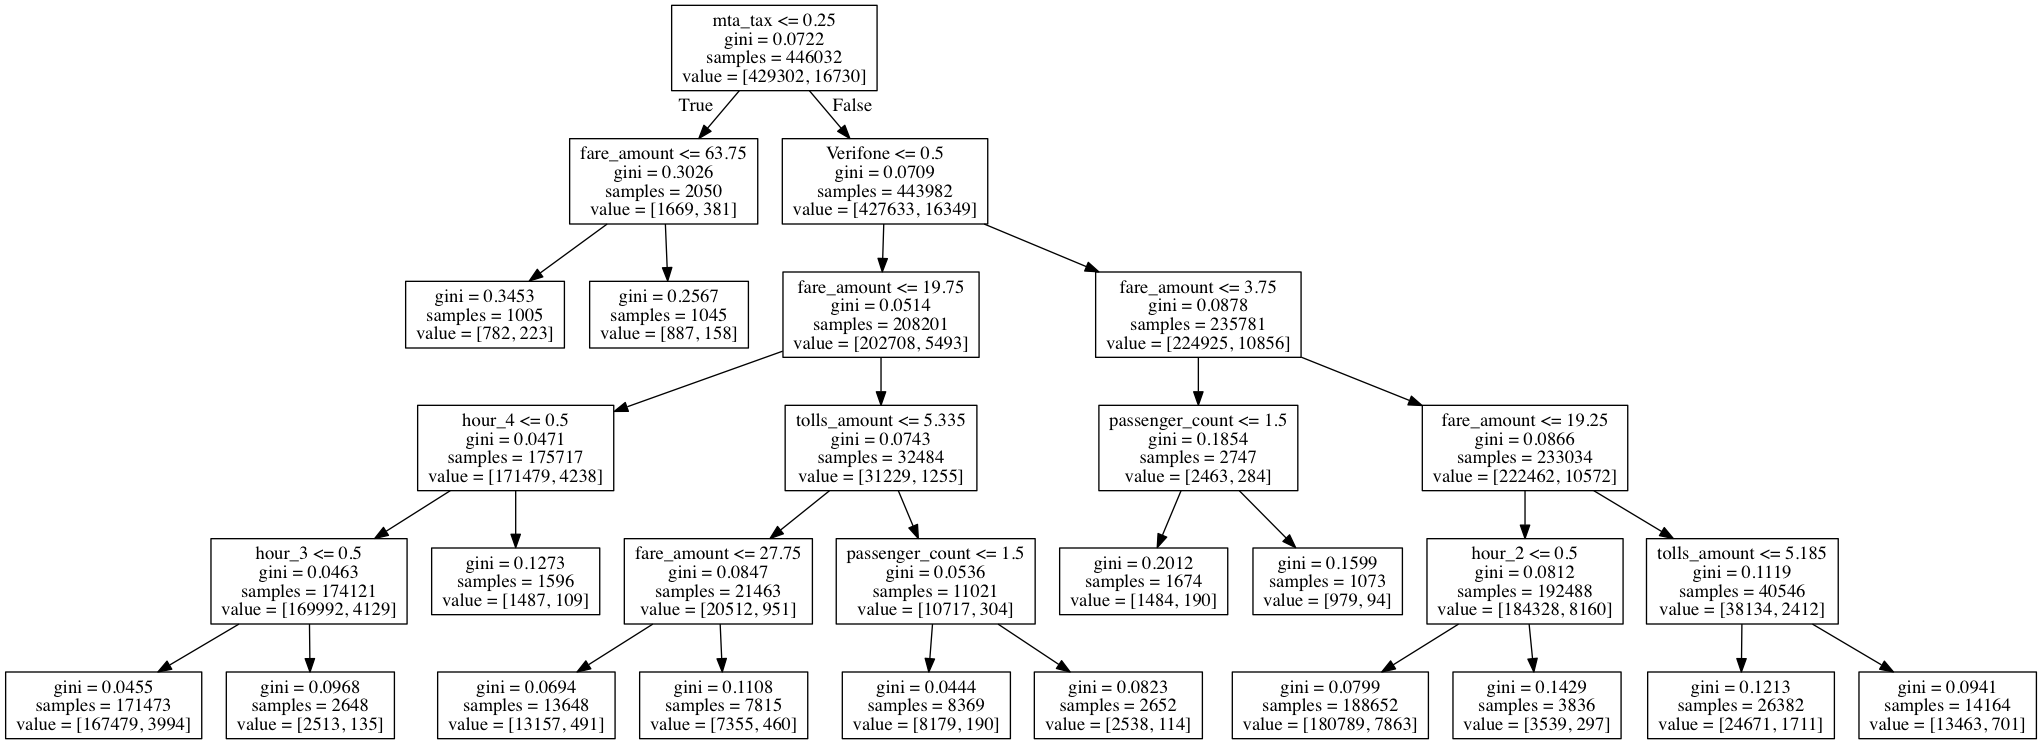

In [60]:
model = model.fit(X, y)

dot_data = tree.export_graphviz(model, feature_names=X.columns)
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())

In [ ]:
##Random Forest Model for tiprate_zero

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

forestmodel = RandomForestClassifier(n_estimators = 20)

X = data[XList]
y = data['tiprate_zero']

forestmodel.fit(X, y)

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(forestmodel, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


CV AUC [ 0.54566625  0.53766984  0.54154177], Average AUC 0.541625951025


In [13]:
forestmodel.fit(X, y)

features = X.columns
feature_importances = forestmodel.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

In [ ]:
##Logistic model (Using Statsmodel. Ulitmately we'll use the ScikitLearn version, but this helps look at confidence intervals)

In [25]:
XList = ['passenger_count','extra','mta_tax','tolls_amount','improvement_surcharge','fare_amount','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Verifone','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','February','March','April','May','June','July','August','September','October','November','December']

In [26]:
X = data[XList]
y = data['tiprate_zero']

In [27]:
lm2 = sm.Logit(y,X)
result = lm2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.155768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           tiprate_zero   No. Observations:               446032
Model:                          Logit   Df Residuals:                   445985
Method:                           MLE   Df Model:                           46
Date:                Wed, 30 Nov 2016   Pseudo R-squ.:                 0.02611
Time:                        21:46:07   Log-Likelihood:                -69477.
converged:                       True   LL-Null:                       -71340.
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
passenger_count           0.0033      0.006      0.571      0.568        -0.008     0.015
extra                     0.0165      0.031      0.542      0.588        -0.043     0.076
mta_tax                  -2.6289      0.147    -17.837      0.000        -2.918    -2.340
tolls_amount             -0.0647      0.006    -11.487      0.000        -0.076    -0.054
improvement_surcharge    -7.6946      0.303    -25.379      0.000        -8.289    -7.100
fare_amount               0.0135      0.001     20.017      0.000         0.012     0.015
Tuesday                  -0.0439      0.032     -1.354      0.176        -0.107     0.020
Wednesday                -0.0162      0.032     -0.512      0.609        -0.078     0.046
Thursday                  0.0369      0.031      1.188      0.235        -0.024     0.098
Friday                    0.1112      0.031      3.620      0.000         0.051     0.171
Saturday                  0.1705      0.031      5.483      0.000         0.110     0.231
Sunday                    0.1240      0.032      3.882      0.000         0.061     0.187
Verifone                  0.5703      0.017     32.936      0.000         0.536     0.604
hour_1                    0.1677      0.051      3.286      0.001         0.068     0.268
hour_2                    0.3191      0.054      5.907      0.000         0.213     0.425
hour_3                    0.4659      0.058      8.024      0.000         0.352     0.580
hour_4                    0.5941      0.063      9.462      0.000         0.471     0.717
hour_5                    0.1359      0.074      1.830      0.067        -0.010     0.282
hour_6                   -0.1634      0.064     -2.569      0.010        -0.288    -0.039
hour_7                   -0.4477      0.058     -7.653      0.000        -0.562    -0.333
hour_8                   -0.5214      0.056     -9.321      0.000        -0.631    -0.412
hour_9                   -0.4005      0.055     -7.318      0.000        -0.508    -0.293
hour_10                  -0.3513      0.055     -6.412      0.000        -0.459    -0.244
hour_11                  -0.3451      0.054     -6.335      0.000        -0.452    -0.238
hour_12                  -0.3524      0.054     -6.551      0.000        -0.458    -0.247
hour_13                  -0.2976      0.053     -5.586      0.000        -0.402    -0.193
hour_14                  -0.2822      0.053     -5.351      0.000        -0.386    -0.179
hour_15                  -0.2656      0.053     -5.043      0.000        -0.369    -0.162
hour_16                  -0.2585      0.052     -4.959      0.000        -0.361    -0.156
hour_17                  -0.3242      0.050     -6.441      0.000        -0.423    -0.226
hour_18                  -0.4695      0.050     -9.482      0.000        -0.567    -0.372
hour_19                  -0.4762      0.049     -9.702      0.000        -0.572    -0.380
hour_20                  -0.4816      0.049     -9.736      0.000        -0.579    -0.385
h

In [28]:
result.conf_int()

,0,1
passenger_count,-0.008036,0.014647
extra,-0.043294,0.076356
mta_tax,-2.917717,-2.339997
tolls_amount,-0.075723,-0.053650
improvement_surcharge,-8.288816,-7.100365
fare_amount,0.012158,0.014797
Tuesday,-0.107430,0.019642
Wednesday,-0.078415,0.045934
Thursday,-0.023984,0.097830
Friday,0.051011,0.171450


In [8]:
####Logistic Regression, with CV and Optimization
####scikit learn
####

In [9]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [70]:
XList = ['passenger_count','trip_distance','extra','mta_tax','tolls_amount','improvement_surcharge','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Verifone','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23','February','March','April','May','June','July','August','September','October','November','December']

In [71]:
X = data[XList]
y = data['tiprate_zero']

In [72]:
lm.fit(X,y)

//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


LogisticRegression(C=10, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
print lm.coef_
print lm.intercept_
print y.mean()

[[  5.40186112e-03   6.92846705e-03   2.08172603e-02  -3.34174436e+00
   -4.42784964e-03  -6.39257453e+00  -5.14635884e-02  -1.06324065e-02
    3.50436678e-02   1.16075643e-01   1.77028497e-01   1.30784881e-01
    5.87651097e-01   1.48126374e-01   2.85513311e-01   4.36377260e-01
    6.09155430e-01   1.24449025e-01  -1.94064593e-01  -4.86825696e-01
   -5.65983916e-01  -4.40427204e-01  -3.96206914e-01  -3.88356581e-01
   -3.93859331e-01  -3.26365350e-01  -3.12855414e-01  -2.92353030e-01
   -2.84707587e-01  -3.45215943e-01  -5.18170424e-01  -5.29350459e-01
   -5.24909510e-01  -5.06883764e-01  -4.46753545e-01  -2.26240807e-01
    5.77135811e-02   9.56457014e-02   7.70310179e-02   5.72172375e-02
    1.38439415e-01   6.42066386e-02   1.21029566e-01   6.67514082e-04
    1.95492714e-02   4.04815660e-02   9.74356816e-02]]
[ 3.36672937]
0.0375085195681


In [74]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print y.mean()

[[  1.00541648e+00   1.00695252e+00   1.02103545e+00   3.53751969e-02
    9.95581939e-01   1.67394104e-03   9.49838234e-01   9.89423918e-01
    1.03566493e+00   1.12308082e+00   1.19366511e+00   1.13972258e+00
    1.79975599e+00   1.15965944e+00   1.33044479e+00   1.54709234e+00
    1.83887768e+00   1.13252429e+00   8.23604704e-01   6.14574146e-01
    5.67801203e-01   6.43761345e-01   6.72867456e-01   6.78170478e-01
    6.74448924e-01   7.21541524e-01   7.31355649e-01   7.46504950e-01
    7.52234185e-01   7.08067435e-01   5.95609264e-01   5.88987417e-01
    5.91608896e-01   6.02369783e-01   6.39701546e-01   7.97526029e-01
    1.05941152e+00   1.10036914e+00   1.08007558e+00   1.05888582e+00
    1.14848010e+00   1.06631272e+00   1.12865828e+00   1.00066774e+00
    1.01974161e+00   1.04131211e+00   1.10234054e+00]]
[ 28.9835773]
0.0375085195681


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

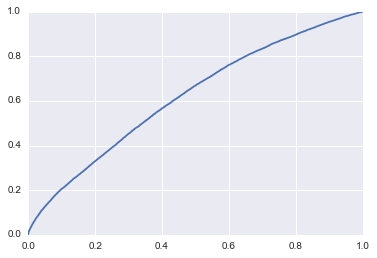

In [76]:
actuals = lm.predict(X) 
probas = lm.predict_proba(X)
plt.plot(roc_curve(y, probas[:,1])[0], roc_curve(y, probas[:,1])[1])

In [77]:
roc_auc_score(y, lm.predict(X))

0.58374907646622798

In [78]:
from sklearn import grid_search, cross_validation

In [79]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [.01, .1, 1, 10], 'class_weight': ['auto']},
    cv=cross_validation.KFold(n=len(X), n_folds=10),
    scoring='roc_auc'
)

gs.fit(X, y)
gs.grid_scores_

//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto'

[mean: 0.61233, std: 0.00606, params: {'C': 0.01, 'class_weight': 'auto'},
 mean: 0.61598, std: 0.00545, params: {'C': 0.1, 'class_weight': 'auto'},
 mean: 0.61585, std: 0.00548, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.61561, std: 0.00557, params: {'C': 10, 'class_weight': 'auto'}]

In [83]:
lm = gs.best_estimator_

results = pd.DataFrame(np.exp(lm.coef_))
results.columns = [X.columns]
results.head()

,passenger_count,trip_distance,extra,mta_tax,tolls_amount,improvement_surcharge,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,September,October,November,December
0,1.005036,1.006481,1.014634,0.075045,1.000477,0.651443,0.951947,0.99102,1.045934,1.128105,1.199353,1.147083,1.788934,1.24219,1.419011,1.638525,1.921362,1.206553,0.884558,0.662255,0.612118,0.691775,0.723626,0.728596,0.724181,0.774115,0.7846,0.801819,0.810955,0.765566,0.646032,0.642081,0.638112,0.649493,0.690185,0.858219,1.062113,1.102633,1.094315,1.062642,1.150532,1.071271,1.131146,1.004893,1.022116,1.045324,1.105587


In [91]:
results_T = pd.DataFrame(results.transpose())
results_T.columns = ['odds_ratio']
results_T

,odds_ratio
passenger_count,1.005036
trip_distance,1.006481
extra,1.014634
mta_tax,0.075045
tolls_amount,1.000477
improvement_surcharge,0.651443
Tuesday,0.951947
Wednesday,0.991020
Thursday,1.045934
Friday,1.128105


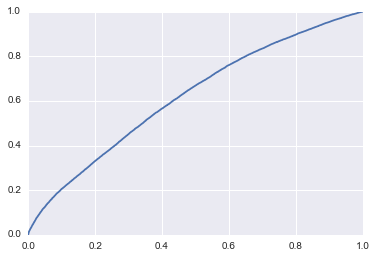

In [87]:
actuals = lm.predict(X) 
probas = lm.predict_proba(X)
plt.plot(roc_curve(y, probas[:,1])[0], roc_curve(y, probas[:,1])[1])

